In [3]:
import pandas as pd
import requests
import pymysql
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from datetime import datetime, timedelta, date, timezone 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [20]:
stopword =['saya','dan','yang','di','jagoan','hosting','untuk','karena','ingin',
           'dengan','magang','dalam','dapat','ini','perusahaan','dari','juga','bidang',
          'merupakan|','sangat','tempat','lebih','tertarik','sebagai','bisa','menjadi',
          'dunia','memiliki','adalah','banyak','hosting.','itu','akan','hal','selain','serta',
          'baik','satu','sehingga','bagi','sudah','salah','jagoanhosting','oleh','menurut','tentang',
          'merasa','secara','ada','pada','bahwa','cukup','saat','tidak','jadi','ini','merupakan','sesuai',
          'mendapatkan','apalagi','ini','untuk','yg']

# Get Dataset

In [21]:
df = pd.read_csv('dataset_tweet_sentimen_tayangan_tv.csv')

In [22]:
df

Id Sentiment           Acara TV  Jumlah Retweet  \
0      1  positive  HitamPutihTransTV              12   
1      2  positive  HitamPutihTransTV               6   
2      3  positive  HitamPutihTransTV               9   
3      4  positive  HitamPutihTransTV               2   
4      5  positive  HitamPutihTransTV               1   
..   ...       ...                ...             ...   
395  396  negative   MataNajwaMetroTV               0   
396  397  negative   MataNajwaMetroTV               0   
397  398  negative   MataNajwaMetroTV               0   
398  399  negative   MataNajwaMetroTV               0   
399  400  negative   MataNajwaMetroTV               0   

                                            Text Tweet  
0    Undang @N_ShaniJKT48 ke hitamputih, pemenang S...  
1    Selamat berbuka puasa Semoga amal ibadah hari ...  
2    Ada nih di trans7 hitam putih, dia dpt penghar...  
3          selamat ya mas @adietaufan masuk hitamputih  
4                    Asiknya nonton Hitam Putih Trans7  
..                                                 ...  
395  ini apa banget deh gw paling kesel klo orang2 ...  
396  Orang miskin semakin miskin klo sekolah melaku...  
397  ga boLeh emosi, cepat tua, nonton #matanajwame...  
398  dr penampilan saja kyk preman taunya bkin kisr...  
399  Jawab aja ga usah berbelit-belit. Muter2 ga je...  

[400 rows x 5 columns]

In [23]:
tweet = list(df['Text Tweet'])

In [24]:
"""
Memecah string menjadi list
"""
ls_word = []
for k in tweet:
    try:
        ls_word.append(k.split())
    except:
        pass

In [25]:
"""
Menggabungkan list menjadi satu
"""
rs = []
for k in ls_word:
    rs = rs + k

In [26]:
rs_lower = [k.lower() for k in rs]
rs_remove_characters = [re.sub(r'[^\w]', '', k) for k in rs_lower]
rs_remove_stopword = [k for k in rs_remove_characters if k not in stopword]

In [27]:
ls_rs = pd.DataFrame(rs_remove_stopword).reset_index()
ls_rs.columns = ['No','Word']

In [28]:
df_Agg = ls_rs.groupby('Word').count().reset_index()
df_Agg = df_Agg.sort_values('No',ascending=False)

In [29]:
df_Agg.head(15)

Word  No
755           kickandy  71
881               mata  61
1069             najwa  60
561                ilc  53
564           ilctvone  46
884   matanajwametrotv  44
519       hitamputiht7  43
516              hitam  40
1291             putih  39
0                       37
17               acara  31
730              keren  30
1111            nonton  29
1150               pak  29
440                 ga  28

In [30]:
wc = WordCloud(background_color="white", max_words=1000, contour_color='firebrick')
text = " ".join(k for k in rs_remove_stopword)

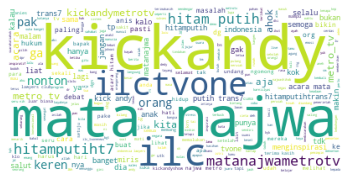

In [31]:
"""
Persepsi mereka tentang JH adalah tempat untuk mendapatkan pengalaman """
wordcloud = wc.generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Sentiment Word

In [32]:
sentiment_word = [
    'bagus','achievement','penghargaan','top','besar','seru','menyenangkan',
    'reputasi','bermanfaat','lama','muda','rekomendasi','potensi','ternama','profesional',
    'keren','lucu','friendly','malang','flexibel','jarak','startup'
]

In [33]:
## Frunction for Matching exact word
def getSentimentWord(text):
    ls_split = text.lower()
    ls_getWord = []
    for j in sentiment_word:
        res = re.findall('\\b'+j+'\\b', text, flags=re.IGNORECASE)
        if len(res) > 0:
            ls_getWord.append(res[0])
    
    ls_concat = " ".join(ls_getWord)

    return ls_concat

In [34]:
## Matching exact word
ls_extract_word = []
for k in tweet:
    try:
        ls_extract_word.append(getSentimentWord(k))
    except:
        ls_extract_word.append('')
        
df_extract_word= pd.DataFrame(ls_extract_word)

In [36]:
## Menambahkan kolom baru hasil sentiment dan memfilter row yang hanya ada isinya
dfAll2 = df.copy()

dfAll2['RS'] = df_extract_word
dfAll2 = dfAll2.applymap(str)

dfAllNull = dfAll2[dfAll2.RS=='']
dfAllNotNull = dfAll2[dfAll2.RS!='']

In [37]:
## Menggabubgkan menjadi satu paragraf
ls_not_null = []
for k in list(dfAllNotNull['RS']):
    ls_not_null.append(k)

str_not_null = " ".join(ls_not_null)

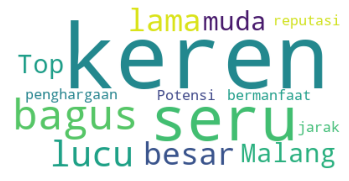

In [39]:
wordcloud = wc.generate(str_not_null)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [42]:
dd_total = pd.DataFrame(str_not_null.split())
dd_total.reset_index(inplace=True)
dd_total.columns = ['No','Word']
dd_total['Word'] = dd_total['Word'].str.lower()

dd_Agg = pd.DataFrame(dd_total.groupby('Word').count()['No']).reset_index()
dd_Agg = dd_Agg.sort_values('No',ascending=False)
dd_Agg

Word  No
4         keren  29
12         seru  11
0         bagus   4
6          lucu   4
2         besar   3
5          lama   3
7        malang   2
8          muda   2
13          top   2
1    bermanfaat   1
3         jarak   1
9   penghargaan   1
10      potensi   1
11     reputasi   1

# Bigram

In [48]:
## menentukan kata yang ingin dijadikan bigram
top_unigram = list(df_Agg.head(30)['Word'])

In [45]:
## Cleaning Data
text2 = []
for k in tweet:
    rs_split = k.split()
    rs_lower = [k.lower() for k in rs_split]
    rs_remove_characters = [re.sub(r'[^\w]', '', k) for k in rs_lower]
    rs_remove_stopword = [k for k in rs_remove_characters if k not in stopword]
    rs_concat = " ".join(rs_remove_stopword)
    text2.append(rs_concat)

In [46]:
## Fungsi untuk mendapatkan pasangan kata dengan sebelumnya
def getBigramBefore(text0,top_unigram):
    text = text0.split()
    bigram = []
    for k in range(len(text)):
        for j in range(len(top_unigram)):
            if text[k] == top_unigram[j]:
                try:
                    res = text[k-1] + ' ' + text[k]
                except:
                    res = text[k] 

                bigram.append(res)
            
    return bigram

In [49]:
## Mendapatkan pasangan kata
bigram_before = []
for k in text2:
    rs = getBigramBefore(k,top_unigram)
    if len(rs) >= 1:
        bigram_before.append(rs)

In [56]:
## Menjadikan bigram menjadi satu list agar bisa dibuat dataframe agar bisa di groupby
ls_bigram = []
for k in bigram_before:
    ls_bigram = ls_bigram + k

In [58]:
df_bigram = pd.DataFrame(ls_bigram)

In [60]:
df_bigram.reset_index(inplace=True)

In [62]:
df_bigram.columns = ['No','Bigram']

In [76]:
df_bigram

No                 Bigram
0      0             nih trans7
1      1           trans7 hitam
2      2            hitam putih
3      3         asiknya nonton
4      4           nonton hitam
..   ...                    ...
885  885              jawab aja
886  886                 aja ga
887  887              muter2 ga
888  888               waktu ga
889  889  mutu matanajwametrotv

[890 rows x 2 columns]

In [73]:
## Menghitung bigram yang paling tinggi frekuensinya
dfAggBigram = df_bigram.groupby('Bigram').count().reset_index()
dfAggBigram.columns = ['Bigram','Frekuensi']
dfAggBigram = dfAggBigram.sort_values('Frekuensi',ascending=False)

In [74]:
dfAggBigram

Bigram  Frekuensi
358                  mata najwa         59
188                 hitam putih         37
409                    metro tv         18
531                putih trans7         13
5                    acara mata          9
..                          ...        ...
235         inspirasi indonesia          1
236  inspirasi matanajwametrotv          1
237           inspiratif banget          1
238             inspiratif mata          1
661       zhonk kickandymetrotv          1

[662 rows x 2 columns]